# Predicting the Spread of a Disease with Machine Learning Algorithms!

---

### _The process of identifying, assessing, and managing people who have been exposed to a disease to prevent transmission. <br> People who may have been exposed to the virus from affected countries/people are to be traced and monitored for certain number of days._


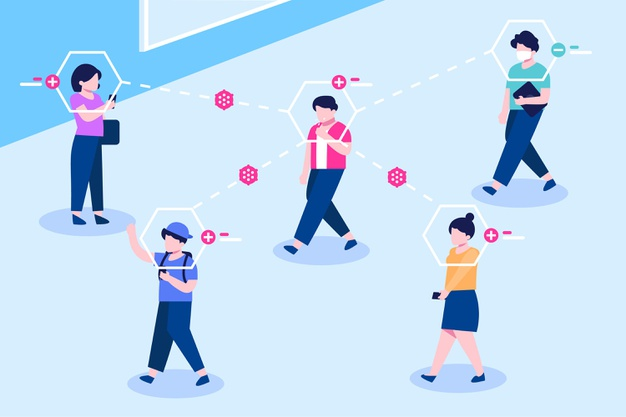

### _This works for any person who had contact with patients under treatment for suspected, probable or confirmed case of that certain disease. Generally, Any person who provided care for the patient suspected or confirmed with the disease, including a health care worker or family member._

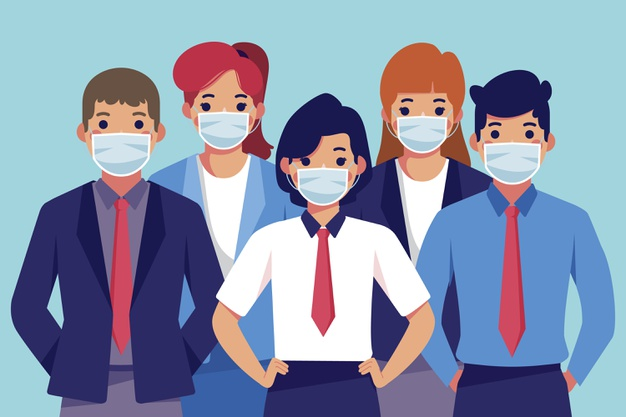

### _Contact tracing is a key component of a public health response to infectious disease outbreaks. The purpose of this guidance is to reinforce the place of community engagement and participation in the contact tracing process. The guidance and related products articulate best practice principles for community engagement and how they can be operationalized as part of any community-centred contact tracing strategy_

---

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [4]:
## Reading the dataset from Kaggle
df=pd.read_json('spread of disease dataset.json')

In [5]:
df.head()

,id,latitude,longitude,timestamp
0,David,13.148953,77.593651,2020-07-04 15:35:30
1,David,13.222397,77.652828,2020-07-04 16:35:30
2,Frank,13.236507,77.693792,2020-07-04 14:35:30
3,Carol,13.163716,77.562842,2020-07-04 21:35:30
4,Ivan,13.232095,77.580273,2020-07-04 22:35:30


## *Checking for Null values*


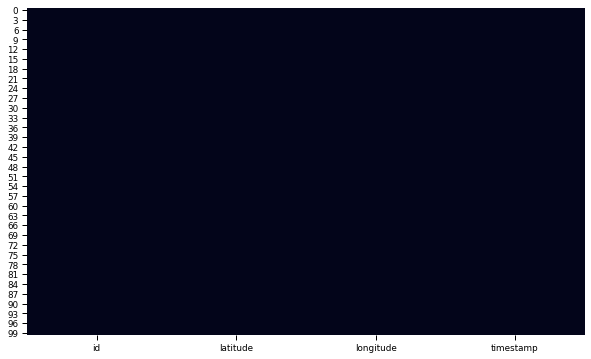

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('poster')

#### So, No null values to take care of !

---

## _Exploratory Data Analysis_

In [14]:
df.shape

(100, 4)

In [12]:
df.describe()

,latitude,longitude
count,100.000000,100.000000
mean,13.134709,77.639229
std,0.069591,0.046132
min,13.010284,77.553381
25%,13.081266,77.596577
50%,13.133868,77.646240
75%,13.195195,77.681645
max,13.249645,77.705454


### _Finding Correlations_

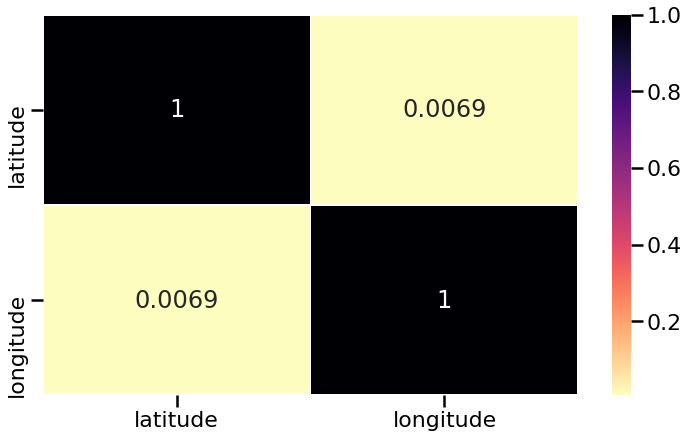

In [30]:
corr = df.corr(method='kendall')
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap="magma_r", linewidths=.9)

### _Visualizations_

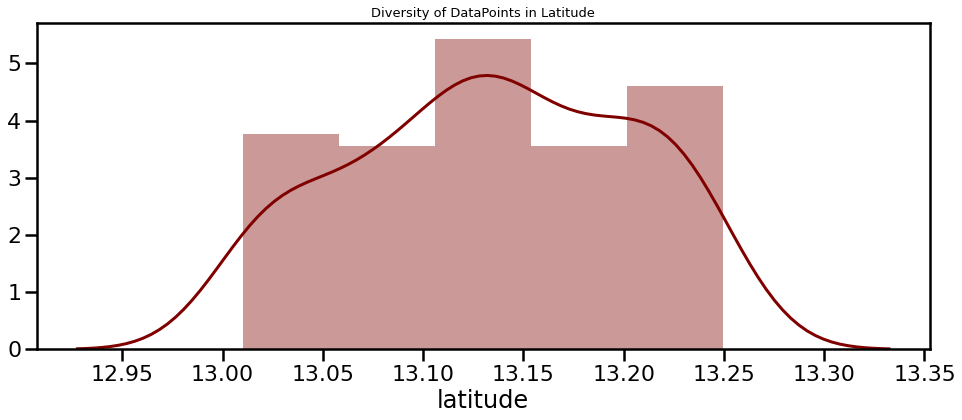

In [34]:
plt.figure(figsize=(16,6))
sns.distplot(df['latitude'], color = 'maroon')
plt.title('Diversity of DataPoints in Latitude', size = 13)
plt.show()

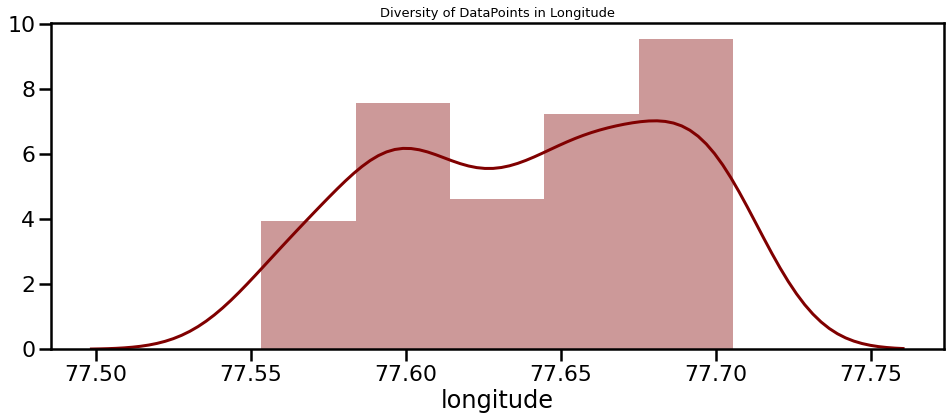

In [37]:
plt.figure(figsize=(16,6))
sns.distplot(df['longitude'], color = 'maroon')
plt.title('Diversity of DataPoints in Longitude', size = 13)
plt.show()

### _Place of tracing for the following people_

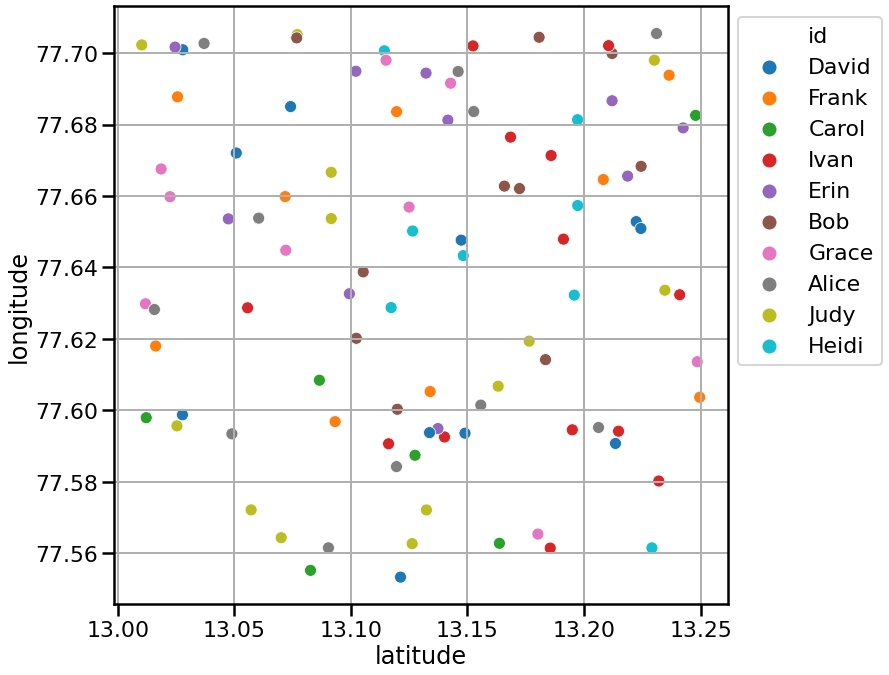

In [60]:
plt.figure(figsize=(11,11))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="id")
sns.set_context('poster')
plt.legend(bbox_to_anchor=(1.27,1),loc='upper right')
plt.grid()

### _A simple countplot for visualizing the frequency_

Text(0.5, 1.0, 'Frequency of name of people in this Dataset :')

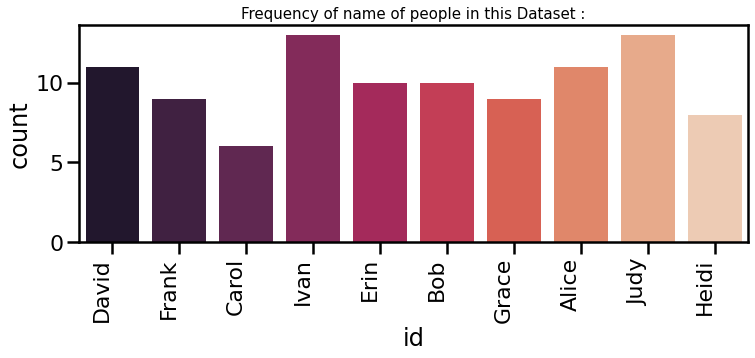

In [50]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='id',data=df, palette='rocket')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Frequency of name of people in this Dataset :", size =15)

---
# Creating the Model
## _Using DBSCAN Clustering_

_DBSCAN is an Unsupervised Machine Learning Technique._ <BR>
_By which, we will be able to Cluster the Data Points Precisely._ <br>
_It also helps to detect the noise in Dataset_


In [54]:
df.head()

,id,latitude,longitude,timestamp
0,David,13.148953,77.593651,2020-07-04 15:35:30
1,David,13.222397,77.652828,2020-07-04 16:35:30
2,Frank,13.236507,77.693792,2020-07-04 14:35:30
3,Carol,13.163716,77.562842,2020-07-04 21:35:30
4,Ivan,13.232095,77.580273,2020-07-04 22:35:30


In [61]:
from sklearn.cluster import DBSCAN

In [185]:
safe_distance = 0.018288
model2 = DBSCAN(eps=safe_distance, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
core_samples_mask = np.zeros_like(model2.labels_, dtype=bool)
core_samples_mask[model2.core_sample_indices_] = True
labels = model2.labels_
df['Clusters'] = model2.labels_.tolist()

In [189]:
model2

DBSCAN(eps=0.018288, metric='haversine', min_samples=2)

## _Clusters made by DBSCAN algorithm_

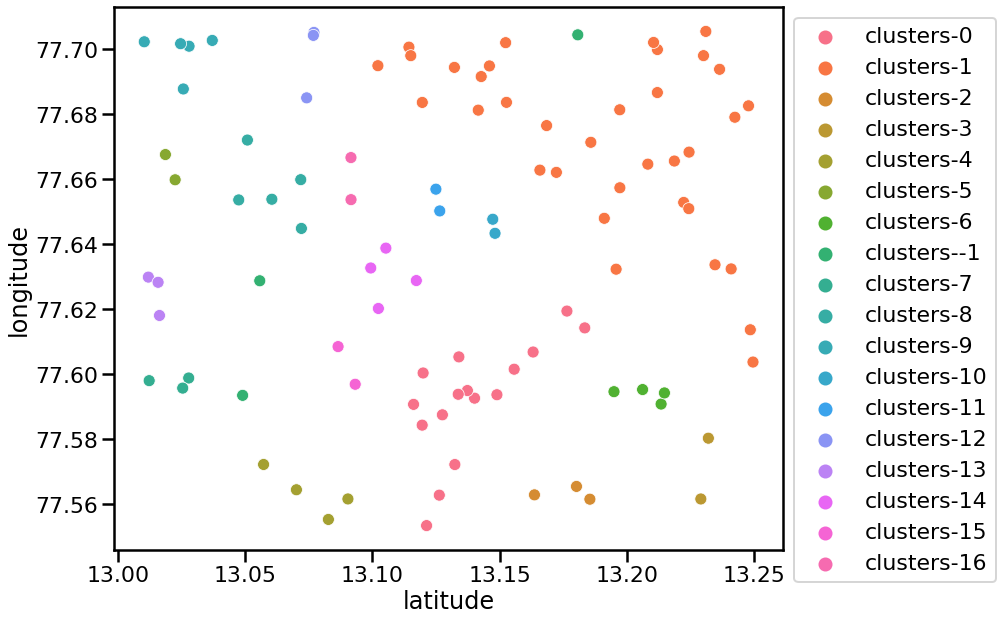

In [190]:
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['clusters-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
sns.set_context('poster')
plt.show()

## _Predicting Disease Transfer for a Person :_

In [241]:
Name = "Ivan"
inputCluster = set()
for i in range(len(df)):
    if df['id'][i] == Name:
        inputCluster.add(df['Clusters'][i])

In [243]:
infected = set()
for cluster in inputCluster:
    if cluster != -1:
        namesInCluster = df.loc[df['Clusters'] == cluster, 'id']
        for i in range(len(namesInCluster)):
            name = namesInCluster.iloc[i]
            if name != Name:
                infected.add(name)

In [250]:
name

'Alice'

## Here, we cn say that Alice was infected by Ivan !
---